# 人工知能（機械学習）の「学習」と「予測」
2021/10/10 ver.  
**～このノートの途中に、演習課題が用意されています。ぜひ、腕試しに挑戦してください。～** 

ここでは、従来のアルゴリズム（ルールベース）を用いた問題解決の手順と、人工知能（機械学習）での問題解決のメカニズムの違いを演習します。  

演習では、ルールベースと機械学習を用いて、それぞれ同じ目的を達成するプログラムを作成します。各手法が出力する「結果は同じ」であっても、そこに至るプロセスがまったく違うことに注目してください。すでにJavaやPythonなど、何かしらのプログラム言語を学ばれたかた向けの内容も含まれますが、プログラミング未経験者の方も、ぜひ従来の手法との違いを感じてください。  

また途中、論理和(OR)演算などコンピュータ・サイエンスの内容も若干含まれます。これらをまだ学習していない人は、別途、参考リンクを参照の上、進めましょう。


## ここで学習すること

* 「ルールベース」の考え方
* 「機械学習」の考え方

## ルールベース
従来のアルゴリズムを用いたプログラムは、ルールベースで処理を行います。例えば「Aの値が10以上であれば、処理Xを行う」といったルール（計算式）の集合体（アルゴリズム）を記述することで、全体として複雑なシステムを実現します。ルールはあらかじめ人（SEやプログラマ）が決めるもので、コンピュータはこのルールに従って動作します。ルールを破ることもなければ、ルールそのものをコンピュータが書き換えるようなこともしません。  

電卓のプログラムを例にするならば、1+1と入力された場合、必ず結果が「2」になります。あらかじめ組み込まれたルールに従って計算するので、何度「1+1」を実行しても、必ず「2」が出力されるハズですし、そうなることが求められています。これは当たり前のようですが、後述する「機械学習」では、その点が異なってきますので、覚えておいてください。

### 論理和（OR）
ここでは、簡単なプログラムの例として「論理和（OR）演算」の処理をルールベースで記述します。  

論理和演算とは、2つの値（仮にAとB）が入力されたときに、次のような結果となる論理演算のことです。 

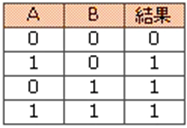

**補足**：論理演算を学んでいない人には、少し分かりにくいかもしれません。ただ、じっくり見るとそれほど難しいルールではないことに気がつくと思います。結果をよく見ると、A+Bの足し算（和）に似ていると思いませんか？　ただし、1+1=2ではなく、1+1=1になるのは注意です。その理由はここでは考えず、「そういうものか」と思って先に進んで大丈夫です。

**参考：**[シスアド講座  論理演算](http://www.pursue.ne.jp/jouhousyo/sysad/sysad011.htm)  
**参考：**[論理演算（ブーリアン演算）とは - IT用語辞典 e-Words](http://e-words.jp/w/%E8%AB%96%E7%90%86%E6%BC%94%E7%AE%97.html)  

まずは、この論理和演算を従来のルールベースで記述します。

In [ ]:
a = 0
b = 1

if a == 1 or b == 1:
  print('結果は1です')
else:
  print('結果は0です')

**注釈:** if文で「aの値が1、またはbの値が1であれば、結果は1とする」「それ以外であれば、結果は0とする」というルールが記述されています。また、冒頭の「a=0」や「b=1」の値を変更して、他のパターンでも、正しく論理和演算として処理されるか確認してみましょう。

### 演習①：論理積（AND）
論理積（AND）演算の処理を、ルールベースで記述せよ。なお、論理積とは、次の真理値表の通りに結果を出力する演算である。

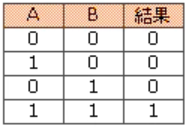

In [ ]:
##### 演習：以下の■空欄■にプログラムを記入せよ #####

a = 0
b = 1

if a == 1 ■空欄■ b == 1:
  print('結果は1です')
else:
  print('結果は0です')

######################################################

補足：論理和（OR）演算のとき、ifで記述した条件式`a==1`と`b==1`の間に入ったのは「or」というキーワードでした。それでは論理積（AND）演算の場合は何を入れればよいでしょうか？（アルファベットの大文字・小文字に気をつけてトライしてください）

## 機械学習

「機械学習」という言葉をはじめて聞いた方も多いのではないでしょうか？　「機械学習」は「マシン・ラーニング」と英語で呼ばれることもあります。「機械学習」は、人工知能の手法のひとつです（もちろん「機械学習」ではない人工知能も存在します）2010年代からはじまった第3次AIブームのきっかけともなった「機械学習」です

「機械」が「学習」する…と聞くと、ロボットが一生懸命に勉強しているような場面を思い浮かべる人もいるかもしれませんね。でも、少し違います。ここで取り上げる「機械学習」とは、人工知能が大量のデータからルールやパターンを学習する仕組みのことを指します。


### 機械学習の考え方

ここでは、先程ルールベースで記述したプログラムを、機械学習で実現します。 下図を参照して、まったくアプローチが異なることを、確認しましょう。ポイントは、論理和演算には全部で4パターンが存在するのに、訓練としては、そのうち3パターン（0と0、0と1、1と0）しか学習させていないところです。ここではあえて、「1と1の場合、結果は1になる」ことを機械学習モデルに**教えず**に、3パターンの学習から、この**未知のパターンに対して予測させてみよう**というトライをしています。

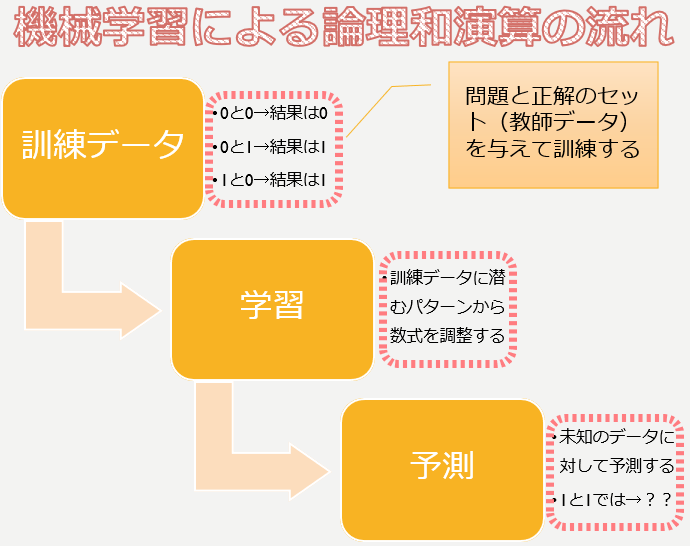

**補足：** ルールベースの場合、コンピュータは教えてもらっていないこと（ルールに記述されていないこと）は、処理できません。しかし、機械学習では事前に学習しておいた結果から、未知の問題に対しても予測をして結果を出力する点が、大きな特徴です（もちろん、予測が外れることもあります。この点もルールベースでは有り得なかったことですね）

以降は、上図の流れをPythonで記述していきます。コードセルを小分けにしながら、処理内容を確認しながら小刻みに進めますので、1ステップずつじっくり理解していきましょう。


### ライブラリのインポート
まずは、機械学習のオープンソース・ライブラリ（インターネット上で公開されていて、誰でも自由に使ってよいプログラム群）である「sklearn(scikit-learn：サイキット・ラーン)」から、線形SVCモデル (Linear SVM Classification＝線形サポートベクトルマシンによるクラス分類) をインポートします。

In [ ]:
# ライブラリのインポート
from sklearn.svm import LinearSVC

**注釈：** なぜ線形SVCモデルを用いるのか？そして他にどんなモデルがあるのか？は、次回以降の講義で補足しますので、ここでは「機械学習に必要な外部ライブラリを読み込んだのだな」程度の認識で大丈夫です。

### モデルの生成
次に、線形SVCモデルを実行するためのオブジェクト（インスタンス）を生成します。

In [ ]:
# 線形SVCモデルの生成
model_svc = LinearSVC()

**注釈：** この1行の意味を正しく理解するには、オブジェクト指向の考え方が必要になるのですが、今回の本題ではありませんので、よく分からなくてもあまり気にせずに先に進みましょう。「mode_svcという名前で、機械学習のモデルを使えるようにしているんだな」くらいの認識でOKです。

**参考：** [インスタンス (instance)とは｜「分かりそう」で「分からない」でも「分かった」気になれるIT用語辞典](https://wa3.i-3-i.info/word1118.html)  
**参考：** [Pythonのインスタンスの基礎を現役エンジニアが解説【初心者向け】 | TechAcademyマガジン](https://techacademy.jp/magazine/23289)  

### 訓練データの作成
次に、機械学習を学習するための**訓練データ**を準備します。今回は次の3パターンを学習させます。  
* 「入力が0と0のとき」
* 「入力が0と1のとき」
* 「入力が1と0のとき」

※前述の通り、ここでは「**入力が1と1のとき**」を、あえて**教えていない**ことに注目してください。  


In [ ]:
# 訓練データの作成（説明変数）
train_x = [[0,0],[0,1],[1,0]]

次に、先の3パターンの入力に対応する結果を準備します。論理和演算の結果は、
* 0と0→「0」
* 0と1→「1」
* 1と0→「1」

でしたので、下記セルのように1次元リストで、これらの値を格納しておきます。

In [ ]:
# 訓練データの作成（目的変数）
train_y = [0, 1, 1]

**補足：** 訓練データは上記のように「入力（問題）」と「結果（正解）」の2つの要素構成されています。機械学習（や数学）では特にこれらを、以下のように呼ぶことが多いので、覚えておきましょう。
* 入力（問題）→「**説明変数**」（プログラムでは変数名にxを付けることが多い）
* 結果（正解）→「**目的変数**」（プログラムでは変数名にyを付けることが多い）

「説明変数」は読んで字のごとく、目的の値（目的変数）が、なぜその値になるのかを「説明するための変数」というわけですね。

### 学習
訓練データが整ったところで、いよいよ学習を行います。学習はすでに生成してある機械学習モデルのインスタンス（今回は「model_svc」という名前で生成）の、fitメソッドを使用します。メソッドに引数で目的変数と説明変数のペアを渡して、fitすることで、学習が開始されます。  

In [ ]:
# 学習
model_svc.fit(train_x, train_y)

**補足：** 訓練が完了すると、機械学習モデルのパラメータが表示されます。これはハイパーパラメータと呼ばれるもので、予測精度を向上させるために、これらをチューニングすることがあります。なお、今回は訓練データが3件だけのとても小規模な学習ですので、一瞬で学習が完了します。しかし、本格的な機械学習モデルでは、訓練データは最低でも1000件単位であったり、数値だけでなく画像ファイルを訓練に用いたりと、とても負荷がかかります。学習に利用するコンピュータ（というかGPU）の性能にも左右されますが、学習に数時間から数日かかることも珍しくありません。

### 予測
学習を実行することで、機械学習モデルが訓練データに潜むパターンから、何かしらの法則を発見します（その法則が的確な場合もあれば、時には的外れな場合もあります）この状態のモデルを「学習済みモデル」と呼びます。ですので、model_svcは今まさに「学習済みモデル」となっているわけです。

一連の手続きの締めくくりとして、訓練データには現れなかった未知のデータを含む、全4パターンの入力を与えて、答えを予測させてみましょう。予測を行うにはpredictメソッドを使用します。

In [ ]:
# 予測
y1 = model_svc.predict([[0,0]])
y2 = model_svc.predict([[0,1]])
y3 = model_svc.predict([[1,0]])
y4 = model_svc.predict([[1,1]])

**注釈：** 上のセルを実行しても何も出力されませんが、エラーが出ていなければ、予測が行われているハズです。予測結果は変数y1,y2,y3,y4に格納されていますので、print文で表示します。


In [ ]:
# 予測結果を表示
print(y1)
print(y2)
print(y3)
print(y4)

**注釈：** どうでしょう、上から順番に[0][1][1][1]という論理和の真理値表と同じ結果が表示されたでしょうか？  
（もし、[0][1][1][1]とならなかった場合は、もう一度「#学習」→「#予測」→「#予測結果を表示」のセルを実行してください）

ここで注目すべきは、訓練データに含まれていない[1,1]のパターンも、結果を正しく[1]と**予測**しているところです。これは訓練データとして与えた[0,0][0,1][1,0]のパターンから、機械学習が学習して、**「1と1なら、結果はたぶん1だろう」**と予測したのです。これが従来のルールベースの処理とまったく異なる概念です！

### コードのまとめ
ここまでのコードを、1つのセルにまとめました。復習を兼ねて、一連の流れを掴んでください。

In [ ]:
###　コードのまとめ：機械学習による論理和（OR）演算 ###

# 訓練データの作成（説明変数）
train_x = [[0,0],[0,1],[1,0]]

# 訓練データの作成（目的変数）
train_y = [0, 1, 1]

# 学習
model_svc.fit(train_x, train_y)

# 予測
y1 = model_svc.predict([[0,0]])
y2 = model_svc.predict([[0,1]])
y3 = model_svc.predict([[1,0]])
y4 = model_svc.predict([[1,1]])

# 予測結果を表示
print(y1)
print(y2)
print(y3)
print(y4)

**補足：** 今回のような超シンプルな問題では心配ありませんが、問題が複雑になると、誤った予測をする場合もあります。結論からいうと、現実的な問題において（例えば天気予報がそうであるように）100%の正解率で予測することは不可能です。しかし、それをどうやって80%、85％、90％、95％、96％、97％…と精度を向上していくかは、機械学習エンジニアの腕にかかっています（また逆に、予測が間違ったときのバックアッププランも含めて、精度が低くても良しとする仕組みを考えておくのも大切です）

### 演習②：論理積（AND）
論理積（AND）演算の処理を、機械学習で記述せよ。

なお、論理積の訓練データとしては、次の4パターンが考えられるが、
* 0と0→「0」
* 0と1→「0」
* 1と0→「0」
* 1と1→「1」

上記のうち、どれか3パターンを訓練データとして与えなさい。つまり、論理和（OR）のときのように、4パターンのうち1つはあえて教えないで、fit（学習）してください。どの3パターンを教えて、どの1パターンを教えないかは、あなたが自由に試行錯誤してください。結果として、以下のように論理積（AND）の真理値表[0][0][0][1]と同じ出力になれば成功です。


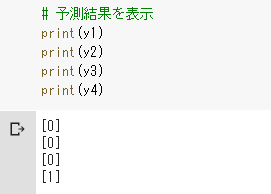

In [ ]:
##### 演習：以下の■空欄■にプログラムを記入せよ #####

###　機械学習による論理和（AND）演算 ###

# 訓練データの作成（説明変数）
train_x = [[0,0],[0,1],[1,0]]

# 訓練データの作成（目的変数）
train_y = [■空欄■]

# 学習
model_svc.fit(train_x, train_y)

# 予測
y1 = model_svc.predict([[0,0]])
y2 = model_svc.predict([[0,1]])
y3 = model_svc.predict([[1,0]])
y4 = model_svc.predict([[1,1]])

# 予測結果を表示
print(y1)
print(y2)
print(y3)
print(y4)

######################################################

---
### 演習③：まとめの考察
ここまでの演習で、2つの問題解決の手法を体験しました。

* 「ルールベース」での問題解決
* 「機械学習」での問題解決

さて、それぞれの手法について、「良い点（得意なこと）」、または「悪い点（苦手なこと）」について考えてみましょう。

* ①「ルールベース」が「機械学習」よりも、優れていると思う点
* ②「機械学習」が「ルールベース」よりも、優れていると思う点

この2つについて、文章でまとめて、レポートとして提出してください。